In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, ElasticNet

from lightgbm import LGBMRegressor
!pip install catboost
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.simplefilter('ignore')

In [ ]:
ss = pd.read_csv('sample_submission.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head(3)

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362


In [ ]:
ID_COL ,TARGET_COL = 'Product_id','Selling_Price'

num_cols = ['Stall_no','Market_Category','Grade','Demand','Discount_avail','charges_1','charges_2 (%)','Minimum_price','Maximum_price']
cat_cols = ['Customer_name','Loyalty_customer','Product_Category']
date_cols = ['instock_date']

In [ ]:
train.shape, test.shape

((6368, 15), (3430, 14))

In [ ]:
train.nunique()

Product_id          6368
Stall_no              50
instock_date        5350
Market_Category      248
Customer_name       5900
Loyalty_customer       2
Product_Category      10
Grade                  4
Demand               100
Discount_avail         2
charges_1            487
charges_2 (%)         17
Minimum_price       4236
Maximum_price       4618
Selling_Price       6321
dtype: int64

In [ ]:
train.describe()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
count,6363.000000,6368.000000,6368.000000,6368.000000,6330.000000,6170.000000,6163.000000,6330.000000,6025.000000,6327.000000
mean,25.309445,199.340609,0.643687,50.921168,0.140442,264.514100,10.146195,3531.349763,6432.545892,4563.242592
std,14.328980,170.275570,1.025092,29.091922,0.347473,124.483056,4.318339,2194.729604,3716.177364,2979.102408
min,1.000000,0.000000,0.000000,1.000000,0.000000,100.000000,1.000000,1.000000,404.000000,-6062.470000
25%,13.000000,55.000000,0.000000,26.000000,0.000000,163.000000,7.000000,1879.250000,3918.000000,2450.005280
50%,25.000000,132.000000,0.000000,51.000000,0.000000,252.000000,10.000000,3157.500000,5634.000000,4210.384640
75%,37.000000,403.000000,2.000000,76.000000,0.000000,314.000000,14.000000,4697.000000,8126.000000,6167.643252
max,50.000000,471.000000,3.000000,100.000000,1.000000,649.000000,17.000000,17580.000000,58812.000000,22638.325941


In [ ]:
null_values_per_variable = 100 * (train.isnull().sum()/train.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending=False)

Maximum_price       5.4
Customer_name       3.3
charges_2 (%)       3.2
charges_1           3.1
Selling_Price       0.6
Minimum_price       0.6
Discount_avail      0.6
Stall_no            0.1
Demand              0.0
Grade               0.0
Product_Category    0.0
Loyalty_customer    0.0
Market_Category     0.0
instock_date        0.0
Product_id          0.0
dtype: float64

In [ ]:
train['Selling_Price'][train['Selling_Price'] < 0] = 0 

In [ ]:
train = train.fillna(0)

In [ ]:
train.isnull().sum().sum()

0

In [ ]:
for c in num_cols + ['Selling_Price']:
  train[c] = np.log1p(train[c])

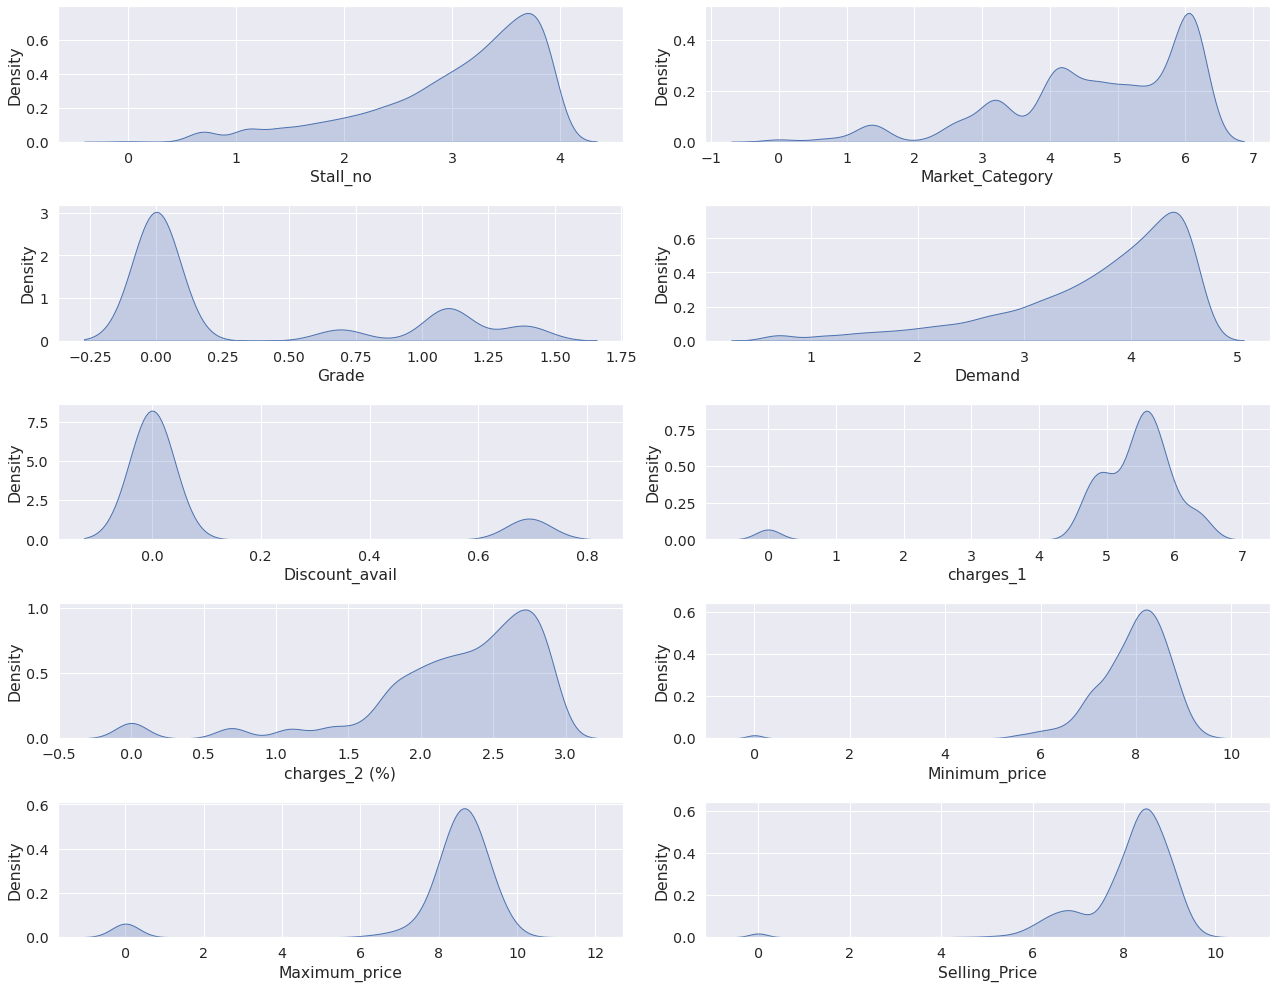

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(5, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols + ['Selling_Price']):
  plot = sns.kdeplot(data=train, x=c, ax=axes[i], fill=True)
plt.tight_layout()

<Figure size 1008x576 with 0 Axes>

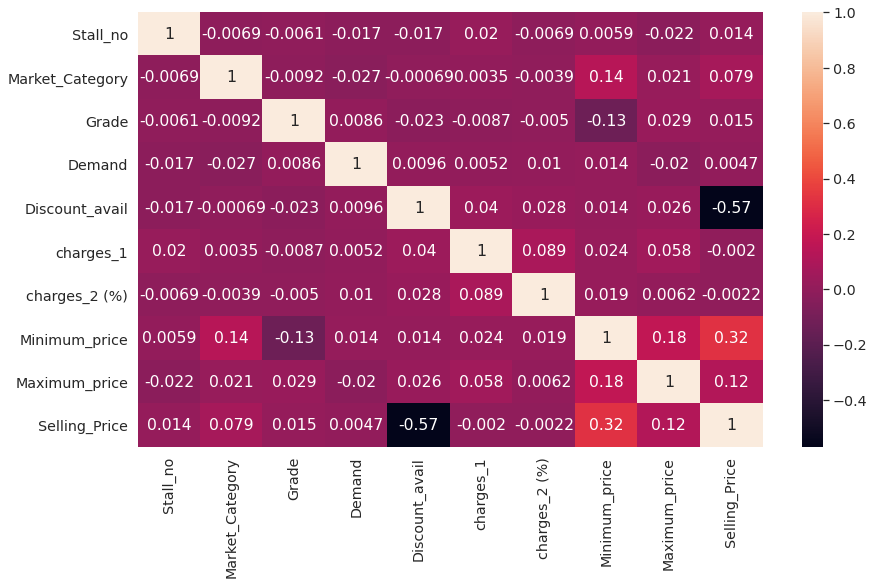

In [ ]:
plt.figure(figsize=(14, 8))
_ = sns.heatmap(train[num_cols + ['Selling_Price']].corr(), annot=True)

In [ ]:
def download_preds(preds_test, file_name = 'hacklive_sub.csv'):

  ## 1. Setting the target column with our obtained predictions
  ss[TARGET_COL] = preds_test

  ## 2. Saving our predictions to a csv file

  ss.to_csv(file_name, index = False)

  ## 3. Downloading and submitting the csv file
  from google.colab import files
  files.download(file_name)

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
df = pd.concat([train, test], axis=0).reset_index(drop = True)
df.shape

(9798, 15)

In [ ]:
df = df.fillna(0)
df.isnull().sum().sum()

0

In [ ]:
df.describe()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
count,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000
mean,25.407328,198.414064,0.652072,50.569810,0.141968,258.533170,10.030108,3482.226169,6137.877424,2946.686658
std,14.359772,169.767862,1.032439,28.918744,0.349035,129.741785,4.495789,2198.258413,3787.192874,3239.546326
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6062.470000
25%,13.000000,55.000000,0.000000,26.000000,0.000000,155.000000,7.000000,1840.250000,3677.000000,0.000000
50%,25.000000,129.000000,0.000000,50.000000,0.000000,250.000000,10.000000,3112.000000,5413.500000,2228.738640
75%,38.000000,389.000000,2.000000,76.000000,0.000000,311.750000,14.000000,4659.000000,7898.750000,4985.919954
max,50.000000,471.000000,3.000000,100.000000,1.000000,649.000000,17.000000,17580.000000,58812.000000,22638.325941


In [ ]:
ID_COL ,TARGET_COL = 'Product_id','Selling_Price'

num_cols = ['Stall_no','Market_Category','Grade','Demand','Discount_avail','charges_1','charges_2 (%)','Minimum_price','Maximum_price']
cat_cols = ['Customer_name','Loyalty_customer','Product_Category']
date_cols = ['instock_date']

In [ ]:
df['Selling_Price'][df['Selling_Price'] < 0] = 0

In [ ]:
df[num_cols+['Selling_Price']] = df[num_cols+['Selling_Price']].apply(lambda x: np.log1p(x))

In [ ]:
df[cat_cols] = df[cat_cols].apply(lambda x: pd.factorize(x)[0])

In [ ]:
df['instock_date'] = pd.to_datetime(df['instock_date'],format='%Y-%m-%d')
df['instock_date_day'] = df['instock_date'].dt.day

df['instock_date_dayofweek'] = df['instock_date'].dt.dayofweek
df['instock_date_year'] = df['instock_date'].dt.year
df['instock_date_month'] = df['instock_date'].dt.month

In [ ]:
df.nunique()

Product_id                9798
Stall_no                    51
instock_date              7688
Market_Category            275
Customer_name             8960
Loyalty_customer             2
Product_Category            10
Grade                        4
Demand                     100
Discount_avail               2
charges_1                  495
charges_2 (%)               18
Minimum_price             5380
Maximum_price             6329
Selling_Price             6308
instock_date_day            31
instock_date_dayofweek       7
instock_date_year            3
instock_date_month          11
dtype: int64

In [ ]:
df['instock_date_count'] = df['instock_date'].map(df['instock_date'].value_counts())
df['Stall_no_count'] = df['Stall_no'].map(df['Stall_no'].value_counts())
df['Market_Category_count'] = df['Market_Category'].map(df['Market_Category'].value_counts())



In [ ]:
df['Loyalty_customer_mean_Minimum_price'] = df.groupby('Loyalty_customer')['Minimum_price'].transform('mean')
df['Loyalty_customer_max_Minimum_price'] = df.groupby('Loyalty_customer')['Minimum_price'].transform('max')
df['Loyalty_customer_min_Minimum_price'] = df.groupby('Loyalty_customer')['Minimum_price'].transform('min')

df['Loyalty_customer_mean_Maximum_price'] = df.groupby('Loyalty_customer')['Maximum_price'].transform('mean')
df['Loyalty_customer_max_Maximum_price'] = df.groupby('Loyalty_customer')['Maximum_price'].transform('max')
df['Loyalty_customer_min_Maximum_price'] = df.groupby('Loyalty_customer')['Maximum_price'].transform('min')

In [ ]:
df['Product_Category_mean_Minimum_price'] = df.groupby('Product_Category')['Minimum_price'].transform('mean')
df['Product_Category_max_Minimum_price'] = df.groupby('Product_Category')['Minimum_price'].transform('max')
df['Product_Category_min_Minimum_price'] = df.groupby('Product_Category')['Minimum_price'].transform('min')

df['Product_Category_mean_Maximum_price'] = df.groupby('Product_Category')['Maximum_price'].transform('mean')
df['Product_Category_max_Maximum_price'] = df.groupby('Product_Category')['Maximum_price'].transform('max')
df['Product_Category_min_Maximum_price'] = df.groupby('Product_Category')['Maximum_price'].transform('min')

In [ ]:
train_proc, test_proc = df[:train.shape[0]], df[train.shape[0]:].reset_index(drop = True)
features = [c for c in train_proc.columns if c not in [TARGET_COL,ID_COL]]
cat_num_cols = [c for c in features if c not in date_cols]

In [ ]:
trn, val = train_test_split(train_proc, test_size=0.2, random_state = 1)

###### Input to our model will be the features
X_trn, X_val = trn[features], val[features]

###### Output of our model will be the TARGET_COL
y_trn, y_val = trn[TARGET_COL], val[TARGET_COL]

##### Features for the test data that we will be predicting
X_test = test_proc[features]

In [ ]:
from sklearn.preprocessing import StandardScaler   
scaler = StandardScaler()
_ = scaler.fit(X_trn[num_cols])

X_trn = scaler.transform(X_trn[num_cols])
X_val = scaler.transform(X_val[num_cols])
X_test = scaler.transform(X_test[num_cols])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

hyperparam_combs = {
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128]
}

clf = RandomizedSearchCV(RandomForestRegressor(),
                         hyperparam_combs,
                         scoring='neg_root_mean_squared_error',
                         random_state=1,
                         n_iter=20)

search = clf.fit(train_proc[num_cols], train_proc[TARGET_COL])

search.best_params_

{'max_depth': 12,
 'max_features': 0.8,
 'max_leaf_nodes': 128,
 'min_samples_split': 2}

In [ ]:
############# Fitting and Predicting ################

clf = RandomForestRegressor(random_state=2,
                            max_depth = 12,
                            max_features = 0.8,
                            max_leaf_nodes = 128,
                            min_samples_split = 2)

 

_ = clf.fit(X_trn, y_trn)

### Instead of directly predicting the classes we will obtain the probability of positive class.
preds_val = clf.predict(X_val)
preds_test = clf.predict(X_test)

In [ ]:
preds_val[ preds_val< 0] = 0
preds_test[preds_test < 0 ] = 0

In [ ]:
from sklearn.metrics import mean_squared_log_error

def av_metric(y_true, y_pred):
  return max(0,100 - np.sqrt(mean_squared_log_error(y_true, y_pred)))

In [ ]:
av_metric_score = av_metric(y_val, preds_val)

print(f'AV metric score is: {av_metric_score}') # 163.09 - RF , 162.81 - LGBM , 165.27 - LR for country 

AV metric score is: 99.44354186649427


In [ ]:
# preds_test_t= np.expm1(preds_test)
download_preds(preds_test, file_name = 'RF4.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def run_clf_kfold(clf, train, test, features):

  N_SPLITS = 5

  oofs = np.zeros(len(train))
  preds = np.zeros((len(test)))

  target = train[TARGET_COL]

  folds = StratifiedKFold(n_splits = N_SPLITS)
  stratified_target = pd.qcut(train[TARGET_COL], 10, labels = False, duplicates='drop')

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, stratified_target)):
    print(f'\n------------- Fold {fold_ + 1} -------------')

    ############# Get train, validation and test sets along with targets ################
  
    ### Training Set
    X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]

    ### Validation Set
    X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]

    ### Test Set
    X_test = test[features]

    ############# Scaling Data ################
    scaler = StandardScaler()
    _ = scaler.fit(X_trn)

    X_trn = scaler.transform(X_trn)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)


    ############# Fitting and Predicting ################

    _ = clf.fit(X_trn, y_trn)

    ### Instead of directly predicting the classes we will obtain the probability of positive class.
    preds_val = clf.predict(X_val)
    preds_test = clf.predict(X_test)

    preds_val[ preds_val< 0] = 0
    preds_test[preds_test < 0 ] = 0

    fold_score = av_metric(y_val, preds_val)
    print(f'\nAV metric score for validation set is {fold_score}')

    oofs[val_idx] = preds_val
    preds += preds_test / N_SPLITS


  oofs_score = av_metric(target, oofs)
  print(f'\n\nAV metric for oofs is {oofs_score}')

  return oofs, preds

In [ ]:
clf = LGBMRegressor()
lgb_oofs, lgb_preds = run_clf_kfold(clf, train_proc, test_proc, num_cols)


------------- Fold 1 -------------

AV metric score for validation set is 99.26152422680866

------------- Fold 2 -------------

AV metric score for validation set is 99.16345651162624

------------- Fold 3 -------------

AV metric score for validation set is 99.30767948888672

------------- Fold 4 -------------

AV metric score for validation set is 99.11208361696247

------------- Fold 5 -------------

AV metric score for validation set is 99.38550223845989


AV metric for oofs is 99.2396771134734


In [ ]:
# lgb_preds_t = np.expm1(lgb_preds)
download_preds(lgb_preds, file_name = 'll.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

def run_gradient_boosting(clf, fit_params, train, test, features):
  N_SPLITS = 5
  oofs = np.zeros(len(train_proc))
  preds = np.zeros((len(test_proc)))

  target = train[TARGET_COL]

  folds = StratifiedKFold(n_splits = N_SPLITS)
  stratified_target = pd.qcut(train[TARGET_COL], 10, labels = False, duplicates='drop')

  feature_importances = pd.DataFrame()

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, stratified_target)):
    print(f'\n------------- Fold {fold_ + 1} -------------')

    ### Training Set
    X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]

    ### Validation Set
    X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]

    ### Test Set
    X_test = test[features]

    
    scaler = StandardScaler()
    _ = scaler.fit(X_trn)

    X_trn = scaler.transform(X_trn)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    _ = clf.fit(X_trn, y_trn, eval_set = [(X_val, y_val)], **fit_params)

    fold_importance = pd.DataFrame({'fold': fold_ + 1, 'feature': features, 'importance': clf.feature_importances_})
    feature_importances = pd.concat([feature_importances, fold_importance], axis=0)

    ### Instead of directly predicting the classes we will obtain the probability of positive class.
    preds_val = clf.predict(X_val)
    preds_test = clf.predict(X_test)
     
    preds_val[ preds_val< 0] = 0
    preds_test[preds_test < 0 ] = 0 

    fold_score = av_metric(y_val, preds_val)
    print(f'\nAV metric score for validation set is {fold_score}')

    oofs[val_idx] = preds_val
    preds += preds_test / N_SPLITS


  oofs_score = av_metric(target, oofs)
  print(f'\n\nAV metric for oofs is {oofs_score}')

  feature_importances = feature_importances.reset_index(drop = True)
  fi = feature_importances.groupby('feature')['importance'].mean().sort_values(ascending = False)[:20][::-1]
  fi.plot(kind = 'barh', figsize=(12, 6))

  return oofs, preds, fi


------------- Fold 1 -------------
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1450.62
[200]	valid_0's rmse: 886.609
[300]	valid_0's rmse: 651.489
[400]	valid_0's rmse: 572.709
[500]	valid_0's rmse: 550.324
[600]	valid_0's rmse: 542.236
[700]	valid_0's rmse: 539.431
[800]	valid_0's rmse: 538.294
[900]	valid_0's rmse: 536.968
[1000]	valid_0's rmse: 535.275
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 535.275

AV metric score for validation set is 99.25798852212682

------------- Fold 2 -------------
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1509.6
[200]	valid_0's rmse: 925.793
[300]	valid_0's rmse: 684.631
[400]	valid_0's rmse: 605.728
[500]	valid_0's rmse: 583.52
[600]	valid_0's rmse: 576.079
[700]	valid_0's rmse: 573.828
[800]	valid_0's rmse: 573.563
[900]	valid_0's rmse: 574
Early stopping, best iteration is:
[849]	valid_0's rmse: 573.316

AV metric score for validation set 

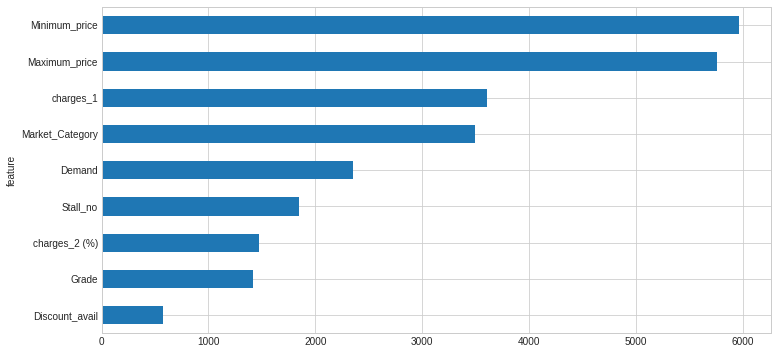

In [ ]:
clf = LGBMRegressor(n_estimators = 1000,
                        learning_rate = 0.01,
                        colsample_bytree = 0.76,
                        metric = 'None',
                        )
fit_params = {'verbose': 100, 'early_stopping_rounds': 100, 'eval_metric': 'rmse'}

lgb_oofs, lgb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, num_cols)

In [ ]:
# lgb_preds_t = np.expm1(lgb_preds)
download_preds(lgb_preds, file_name = 'fl.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


------------- Fold 1 -------------
Training until validation scores don't improve for 200 rounds.
[300]	valid_0's rmse: 651.489
[600]	valid_0's rmse: 542.236
[900]	valid_0's rmse: 536.968
[1200]	valid_0's rmse: 535.173
Early stopping, best iteration is:
[1074]	valid_0's rmse: 534.826

AV metric score for validation set is 99.25904713933375

------------- Fold 2 -------------
Training until validation scores don't improve for 200 rounds.
[300]	valid_0's rmse: 684.631
[600]	valid_0's rmse: 576.079
[900]	valid_0's rmse: 574
Early stopping, best iteration is:
[849]	valid_0's rmse: 573.316

AV metric score for validation set is 99.11665780606829

------------- Fold 3 -------------
Training until validation scores don't improve for 200 rounds.
[300]	valid_0's rmse: 668.377
[600]	valid_0's rmse: 550.08
[900]	valid_0's rmse: 543.705
Early stopping, best iteration is:
[996]	valid_0's rmse: 543.079

AV metric score for validation set is 99.28320374709793

------------- Fold 4 -------------
Trai

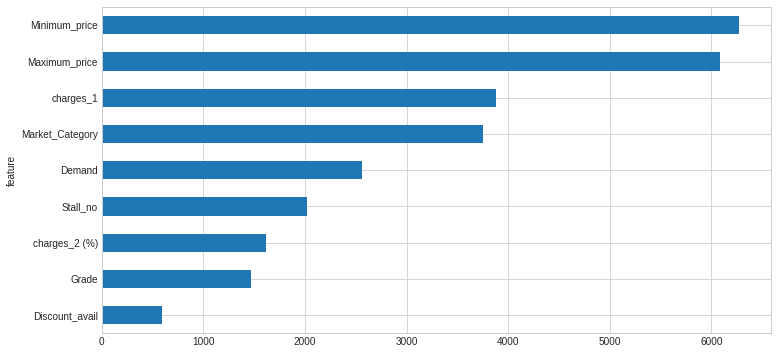

In [ ]:
clf = LGBMRegressor(n_estimators = 5000,
                        learning_rate = 0.01,
                        colsample_bytree = 0.76,
                        metric = 'None',
                        )
fit_params = {'verbose': 300, 'early_stopping_rounds': 200, 'eval_metric': 'rmse'}

lgb_oofs, lgb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, num_cols)

In [ ]:
# lgb_preds_t = np.expm1(lgb_preds)
download_preds(lgb_preds, file_name = 'FLGB.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


------------- Fold 1 -------------
0:	learn: 2958.1049647	test: 2905.2647750	best: 2905.2647750 (0)	total: 51.5ms	remaining: 2m 34s
200:	learn: 919.6140472	test: 873.6726853	best: 873.6726853 (200)	total: 745ms	remaining: 10.4s
400:	learn: 623.2906811	test: 585.7335181	best: 585.7335181 (400)	total: 1.37s	remaining: 8.86s
600:	learn: 557.1526785	test: 535.6303160	best: 535.6303160 (600)	total: 2s	remaining: 8s
800:	learn: 527.9170958	test: 522.7270467	best: 522.7270467 (800)	total: 2.72s	remaining: 7.46s
1000:	learn: 504.6208631	test: 517.5358022	best: 517.5040360 (999)	total: 3.38s	remaining: 6.76s
1200:	learn: 485.2428643	test: 513.6247757	best: 513.6140590 (1199)	total: 4.09s	remaining: 6.13s
1400:	learn: 467.7561540	test: 511.7181740	best: 511.6822929 (1399)	total: 4.81s	remaining: 5.49s
1600:	learn: 452.1022711	test: 510.6634556	best: 510.5478741 (1564)	total: 5.5s	remaining: 4.8s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 510.5478741
bestIteration = 1564


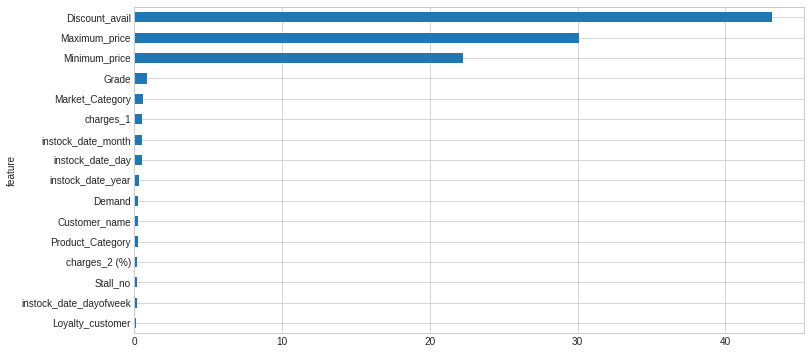

In [ ]:
clf = CatBoostRegressor(n_estimators = 3000,
                       learning_rate = 0.01,
                       rsm = 0.4, ## Analogous to colsample_bytree
                       random_state=2054,
                       )

fit_params = {'verbose': 200, 'early_stopping_rounds': 200}

cb_oofs, cb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, cat_num_cols)

In [ ]:
# cb_preds_t = np.expm1(cb_preds)
download_preds(cb_preds, file_name = 'CB.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


------------- Fold 1 -------------
[14:07:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5198.18
Will train until validation_0-rmse hasn't improved in 200 rounds.
[200]	validation_0-rmse:657.201
[400]	validation_0-rmse:651.271
[600]	validation_0-rmse:650.725
Stopping. Best iteration:
[528]	validation_0-rmse:649.142


AV metric score for validation set is 99.1680520092603

------------- Fold 2 -------------
[14:07:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5294.57
Will train until validation_0-rmse hasn't improved in 200 rounds.
[200]	validation_0-rmse:616.634
[400]	validation_0-rmse:613.869
[600]	validation_0-rmse:612.917
[800]	validation_0-rmse:612.737
Stopping. Best iteration:
[623]	validation_0-rmse:612.479


AV metric score for validation set is 99.08774116764108

------------- Fold 3 -----

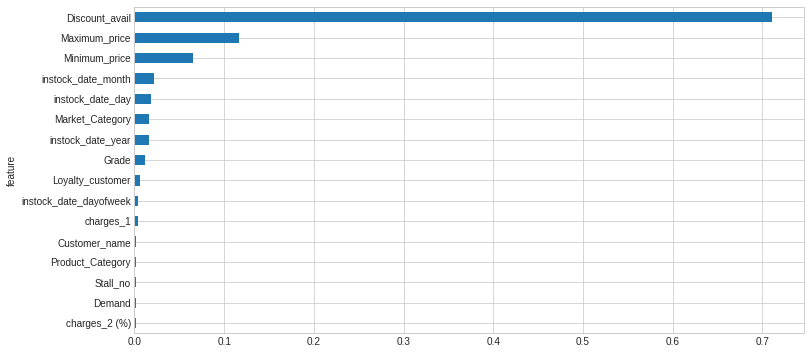

In [ ]:
clf = XGBRegressor(n_estimators = 1000,
                    max_depth = 6,
                    learning_rate = 0.05,
                    colsample_bytree = 0.5,
                    random_state=1452,
                    )

fit_params = {'verbose': 200, 'early_stopping_rounds': 200}

xgb_oofs, xgb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, cat_num_cols)

In [ ]:
# xgb_preds_t = np.expm1(xgb_preds)
download_preds(xgb_preds, file_name = 'XG.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
train_new = train[[ID_COL, TARGET_COL]]

test_new = test[[ID_COL]]

train_new['lgb'] = lgb_oofs
test_new['lgb'] = lgb_preds

train_new['cb'] = cb_oofs
test_new['cb'] = cb_preds

train_new['xgb'] = xgb_oofs
test_new['xgb'] = xgb_preds

features = [c for c in train_new.columns if c not in [ID_COL, TARGET_COL]]

In [ ]:
features

['lgb', 'cb', 'xgb']

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge().fit(train_new,train_new['Selling_Price'])
pred = model.predict(test_new)